# 🏡Linear Regression for House Price Prediction 💰

# Implementing Boston housing dataset using Linear Regression

This program is used to find the expecred price oh house in boston using housing dataset using linear regression method by setting up a target data and a test data formed by dividing the given data into two parts 

    # Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

import warnings
warnings.filterwarnings('ignore')

    # Importing Boston dataset

In [2]:
df = pd.read_csv("DataSets\BostonHousing.csv")
df


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

# Column Descriptions

- **CRIM**: Per capita crime rate by town.

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS**: Proportion of non-retail business acres per town.

- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

- **NOX**: Nitric oxides concentration (parts per 10 million) [parts/10M].

- **RM**: Average number of rooms per dwelling.

- **AGE**: Proportion of owner-occupied units built prior to 1940.

- **DIS**: Weighted distances to five Boston employment centers.

- **RAD**: Index of accessibility to radial highways.

- **TAX**: Full-value property-tax rate per $10,000.

- **PTRATIO**: Pupil-teacher ratio by town.

- **B**: Result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- **LSTAT**: Percentage of lower status of the population.

- **MEDV**: Median value of owner-occupied homes in $1000s.


🛠️🧮 Data Preprocessing and Feature Scaling📏📐

In [3]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
print(df.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [5]:
# check for the null values
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

check shape of dataset and return size of dataset with the column size

In [6]:
print(df.shape)

(506, 14)


In [7]:
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Summary statics of dataframe 

In [8]:
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Split train & test Dataset

split dataset into target value and predictor value Target value = Y (medv) <br>
Predictor value = X (all other features)

In [9]:
X = df.drop('medv' , axis = 1)
Y = df['medv']

SPLIT THE DATA

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.33 , random_state=101 )

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(339, 13)
(167, 13)
(339,)
(167,)
(339, 13)
(167, 13)


# LINEAR REGRESSION

In [12]:
model = LinearRegression()

Fit the dataset to linear regression model
and pass only the training data to fit.

In [13]:
model.fit(X_train_scaled , Y_train)

LinearRegression()

Cross-Validation🔄

In [14]:
# Perform cross-validation
cv_predictions = model.predict(X_test_scaled)
cv_mse = mean_squared_error(Y_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 28.8834


In [15]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.7211


In [25]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': cv_predictions
})

results_df.sample(10)

Actual Values  Predicted Values
85            19.8         21.624138
130           22.1         26.674173
157           17.2         13.050362
102           22.3         27.123543
93            31.0         33.217886
101           20.1         21.112664
155           22.5         21.696611
123           32.4         35.863708
8             41.3         33.307875
136           25.1         30.084164

# Plotting the Predicted data values for X and Y using matplotlib

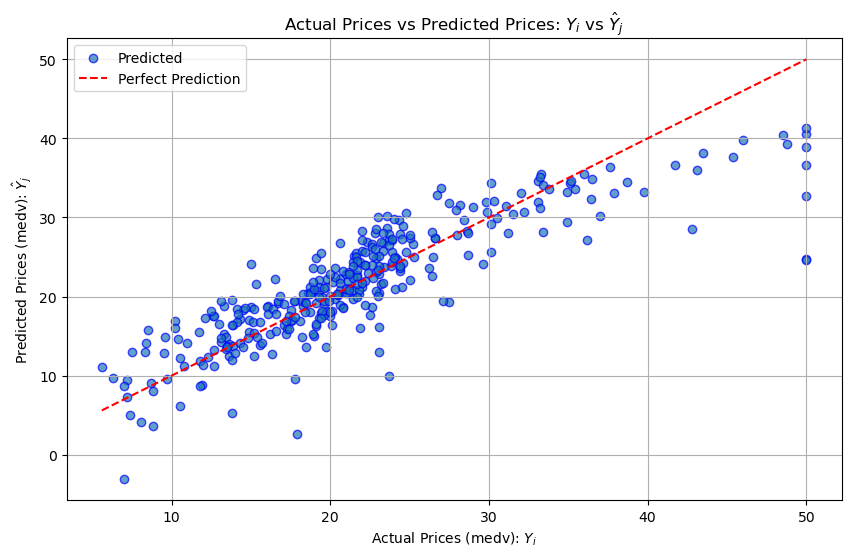

In [31]:
# Predict on the training data
Y_pred = model.predict(X_train_scaled)

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred, alpha=0.7, label='Predicted', edgecolors='b')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Prices (medv): $Y_i$")
plt.ylabel("Predicted Prices (medv): $\hat{Y}_j$")
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_j$")
plt.legend()
plt.grid(True)
plt.show()
